# Tensorflow and its version

In [ ]:
import tensorflow as tf

print(tf.__version__)

2.12.0


# Packages

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

# Transfer Learning

In [ ]:
vgg = tf.keras.applications.VGG16(input_shape = [100, 100, 3], include_top = False, weights="imagenet")

58889256/58889256 [==============================] - 2s 0us/step


# Output

In [ ]:
x = Flatten()(vgg.output)
x = Dense(4, activation = 'sigmoid')(x)
model = Model(vgg.input, x)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128)       0     

# Data Generator (White Box)

In [ ]:
def image_generator(batch_size = 64):
  while True:
    for _ in range(50):
      x = np.zeros((batch_size, 100, 100, 3))
      y = np.zeros((batch_size, 4))

      for i in range(batch_size):
        row0 = np.random.randint(90)
        col0 = np.random.randint(90)
        row1 = np.random.randint(row0, 100)
        col1 = np.random.randint(col0, 100)
        x[i, row0:row1, col0:col1, :] = 1
        y[i, 0] = row0/100.
        y[i, 1] = col0/100.
        y[i, 2] = (row1 - row0)/100.
        y[i, 3] = (col1 - col0)/100.
      yield x, y

# Model Complile and Training

In [ ]:
model.compile(loss = "binary_crossentropy", optimizer = Adam(learning_rate = 0.001))
model.fit(image_generator(),
          steps_per_epoch = 50,
          epochs = 5)

Epoch 1/5


InvalidArgumentError: ignored

# Predicting

In [ ]:
from matplotlib.patches import Rectangle

x = np.zeros((100, 100, 3))
row0 = np.random.randint(90)
col0 = np.random.randint(90)
row1 = np.random.randint(row0, 100)
col1 = np.random.randint(col0, 100)
x[row0:row1, col0:col1, :] = 1
print(row0, row1, col0, col1)

X = np.expand_dims(x, 0)
pred = model.predict(X)[0]
print(pred)
print(x.shape)
fig, ax = plt.subplots(1)
ax.imshow(x)
rect = Rectangle((pred[1]*100, pred[0]*100),
                pred[3]*100, pred[2]*100,
                linewidth = 1, edgecolor = 'r', facecolor = 'none')
ax.add_patch(rect)
plt.show()

# Charmander Image

In [ ]:
!wget -nc https://lazyprogrammer.me/course_files/charmander-tight.png

--2023-07-17 04:20:46--  https://lazyprogrammer.me/course_files/charmander-tight.png
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 403 Forbidden
2023-07-17 04:20:46 ERROR 403: Forbidden.



(56, 44, 4)


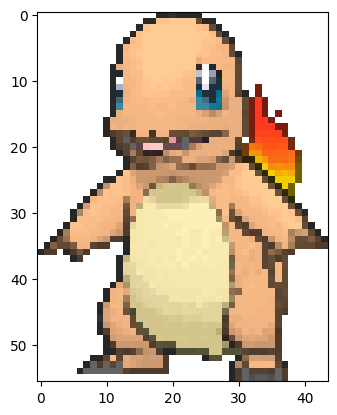

In [ ]:
from imageio.v2 import imread

ch = imread("/content/charmander-tight.png")
print(ch.shape)
plt.imshow(ch);

# Image Generator (Charmander)

In [ ]:
ch = np.array(ch)
ch_h, ch_w, _ = ch.shape

def pokemon_generator(batch_size = 64):
  while True:
    for _ in range(50):
      x = np.zeros((batch_size, 200, 200, 3))
      y = np.zeros((batch_size, 4))

      for i in range(batch_size):
        row0 = np.random.randint(200 - ch_h)
        col0 = np.random.randint(200 - ch_w)
        row1 = row0 + ch_h
        col1 = col0 + ch_w
        x[i, row0:row1, col0:col1, :] = ch[:, :, :3]
        y[i, 0] = row0/200
        y[i, 1] = col0/200
        y[i, 2] = (row1 - row0)/200
        y[i, 3] = (col1 - col0)/200
      yield x/255., y

# Model Compile and Training

In [ ]:
vgg = tf.keras.applications.VGG16(input_shape = [200, 200, 3], include_top = False, weights="imagenet")

In [ ]:
model.compile(loss = "binary_crossentropy", optimizer = Adam(learning_rate = 0.001))
model.fit(pokemon_generator(),
          steps_per_epoch = 50,
          epochs = 5)

Epoch 1/5
50/50 [==============================] - 53s 587ms/step - loss: 1.0709
Epoch 2/5
50/50 [==============================] - 29s 589ms/step - loss: 0.5558
Epoch 3/5
50/50 [==============================] - 30s 596ms/step - loss: 0.5546
Epoch 4/5
50/50 [==============================] - 30s 602ms/step - loss: 0.5535
Epoch 5/5
50/50 [==============================] - 30s 607ms/step - loss: 0.5533


# Predicting

True: 89 145 80 124
1/1 [==============================] - 0s 31ms/step
Pred:  90 133 80 136


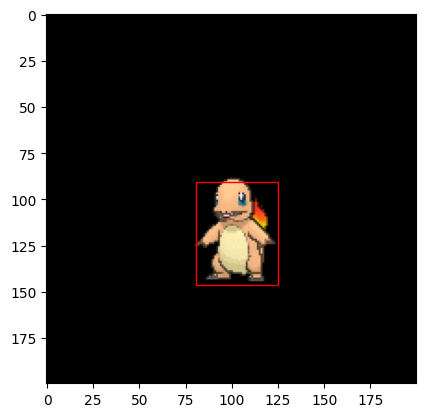

In [ ]:
from matplotlib.patches import Rectangle

x = np.zeros((200, 200, 3))
row0 = np.random.randint(200 - ch_h)
col0 = np.random.randint(200 - ch_w)
row1 = row0 + ch_h
col1 = col0 + ch_w
x[row0:row1, col0:col1, :] = ch[:, :, :3]
print("True:", row0, row1, col0, col1)

X = np.expand_dims(x, 0) / 255.
pred = model.predict(X)[0]
print("Pred: ", int(pred[0]*200), int(pred[3]*200 + row0), int(pred[1]*200), int(pred[2]*200 + col0))
fig, ax = plt.subplots(1)
ax.imshow(x.astype(np.uint8))
rect = Rectangle((pred[1]*200, pred[0]*200),
                pred[3]*200, pred[2]*200,
                linewidth = 1, edgecolor = 'r', facecolor = 'none')
ax.add_patch(rect)
plt.show()

# Image Generator (Pokemon Resized)

In [ ]:
from skimage.transform import resize

def pokemon_generator_resized(batch_size = 64):
  while True:
    for _ in range(50):
      x = np.zeros((batch_size, 200, 200, 3))
      y = np.zeros((batch_size, 4))

      for i in range(batch_size):
        scale = 0.5 + np.random.random()
        new_height = int(ch_h * scale)
        new_width = int(ch_w * scale)
        obj = resize(ch,
                     (new_height, new_width),
                     preserve_range = True).astype(np.uint8)
        row0 = np.random.randint(200 - new_height)
        col0 = np.random.randint(200 - new_width)
        row1 = row0 + new_height
        col1 = col0 + new_width
        x[i, row0:row1, col0:col1, :] = obj[:, :, :3]
        y[i, 0] = row0/200
        y[i, 1] = col0/200
        y[i, 2] = (row1 - row0)/200
        y[i, 3] = (col1 - col0)/200
      yield x/255., y

In [ ]:
model.compile(loss = "binary_crossentropy", optimizer = Adam(learning_rate = 0.0001))
model.fit(pokemon_generator_resized(),
          steps_per_epoch = 50,
          epochs = 5)

Epoch 1/5
50/50 [==============================] - 34s 581ms/step - loss: 0.5500
Epoch 2/5
50/50 [==============================] - 29s 589ms/step - loss: 0.5468
Epoch 3/5
50/50 [==============================] - 30s 595ms/step - loss: 0.5453
Epoch 4/5
50/50 [==============================] - 30s 600ms/step - loss: 0.5442
Epoch 5/5
50/50 [==============================] - 30s 606ms/step - loss: 0.5434


True: 127 181 43 86
1/1 [==============================] - 0s 22ms/step
Pred:  127 170 46 101


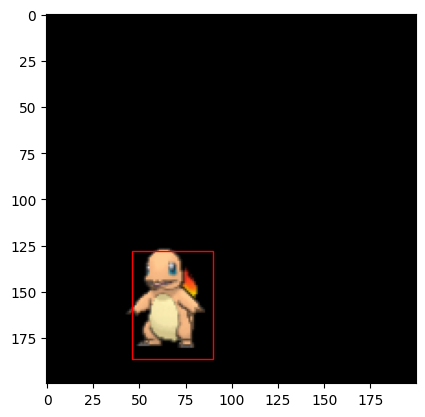

In [ ]:
scale = 0.5 + np.random.random()
new_height = int(ch_h * scale)
new_width = int(ch_w * scale)
obj = resize(ch,
            (new_height, new_width),
            preserve_range = True).astype(np.uint8)
x = np.zeros((200, 200, 3))
row0 = np.random.randint(200 - new_height)
col0 = np.random.randint(200 - new_width)
row1 = row0 + new_height
col1 = col0 + new_width
x[row0:row1, col0:col1, :] = obj[:, :, :3]
print("True:", row0, row1, col0, col1)

X = np.expand_dims(x, 0) / 255.
pred = model.predict(X)[0]
print("Pred: ", int(pred[0]*200), int(pred[3]*200 + row0), int(pred[1]*200), int(pred[2]*200 + col0))
fig, ax = plt.subplots(1)
ax.imshow(x.astype(np.uint8))
rect = Rectangle((pred[1]*200, pred[0]*200),
                pred[3]*200, pred[2]*200,
                linewidth = 1, edgecolor = 'r', facecolor = 'none')
ax.add_patch(rect)
plt.show()

# Image Generator (Pokemon Resized and Flipped)

In [ ]:
from skimage.transform import resize

def pokemon_generator_resized(batch_size = 64):
  while True:
    for _ in range(50):
      x = np.zeros((batch_size, 200, 200, 3))
      y = np.zeros((batch_size, 4))

      for i in range(batch_size):
        scale = 0.5 + np.random.random()
        new_height = int(ch_h * scale)
        new_width = int(ch_w * scale)
        obj = resize(ch,
                     (new_height, new_width),
                     preserve_range = True).astype(np.uint8)
        if np.random.random() < 0.5:
          obj = np.fliplr(obj)
        else:
          obk = obj
        row0 = np.random.randint(200 - new_height)
        col0 = np.random.randint(200 - new_width)
        row1 = row0 + new_height
        col1 = col0 + new_width
        x[i, row0:row1, col0:col1, :] = obj[:, :, :3]
        y[i, 0] = row0/200
        y[i, 1] = col0/200
        y[i, 2] = (row1 - row0)/200
        y[i, 3] = (col1 - col0)/200
      yield x/255., y

In [ ]:
model.compile(loss = "binary_crossentropy", optimizer = Adam(learning_rate = 0.0001))
model.fit(pokemon_generator_resized(),
          steps_per_epoch = 50,
          epochs = 5)

Epoch 1/5
50/50 [==============================] - 35s 581ms/step - loss: 0.5460
Epoch 2/5
50/50 [==============================] - 29s 588ms/step - loss: 0.5434
Epoch 3/5
50/50 [==============================] - 30s 594ms/step - loss: 0.5443
Epoch 4/5
50/50 [==============================] - 30s 599ms/step - loss: 0.5449
Epoch 5/5
50/50 [==============================] - 30s 607ms/step - loss: 0.5453


True: 26 98 142 198
1/1 [==============================] - 0s 22ms/step
Pred:  25 81 145 214


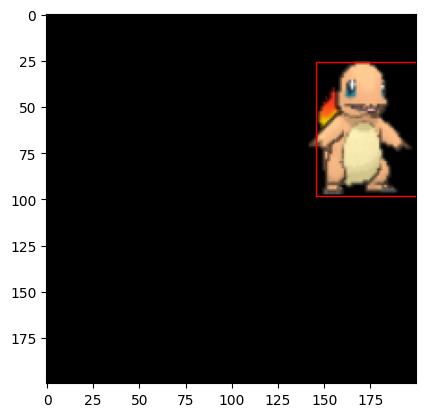

In [ ]:
scale = 0.5 + np.random.random()
new_height = int(ch_h * scale)
new_width = int(ch_w * scale)
obj = resize(ch,
            (new_height, new_width),
            preserve_range = True).astype(np.uint8)
if np.random.random() < 0.5:
  obj = np.fliplr(obj)
else:
  obk = obj
x = np.zeros((200, 200, 3))
row0 = np.random.randint(200 - new_height)
col0 = np.random.randint(200 - new_width)
row1 = row0 + new_height
col1 = col0 + new_width
x[row0:row1, col0:col1, :] = obj[:, :, :3]
print("True:", row0, row1, col0, col1)

X = np.expand_dims(x, 0) / 255.
pred = model.predict(X)[0]
print("Pred: ", int(pred[0]*200), int(pred[3]*200 + row0), int(pred[1]*200), int(pred[2]*200 + col0))
fig, ax = plt.subplots(1)
ax.imshow(x.astype(np.uint8))
rect = Rectangle((pred[1]*200, pred[0]*200),
                pred[3]*200, pred[2]*200,
                linewidth = 1, edgecolor = 'r', facecolor = 'none')
ax.add_patch(rect)
plt.show()